<a href="https://colab.research.google.com/github/Karantiwari307/Yes-bank-stock-closing-price-prediction/blob/main/CAPSTONE_PROJECT_Yes_Bank_Stock_Closing_Pice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Problem Statement:
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [ ]:
# importing library
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
import plotly.express as px 

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing data
df=pd.read_csv("/content/drive/MyDrive/Almabetter projects/data_YesBank_StockPrices.csv")

In [ ]:
# dataset
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


##Let's Explore our dataset(df)




In [ ]:
# shape of dataset
df.shape

(185, 5)

Our dataset have 185 Rows and 5 Columns

In [ ]:
# basic information dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Dataset does not have null values.
Date Column is in object forrmat,So we can change in the Date Time format

In [ ]:
# checking duplicare rows
len(df[df.duplicated()])

0

Dataset does not have any duplicate observation.

In [ ]:
# changing format
df["Date"]=df["Date"].apply(lambda x: datetime.strptime(x,"%b-%y"))
df.set_index('Date',inplace=True)

In [ ]:
# dataset
df.head(10)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
2005-12-01,13.49,14.44,13.00,13.71
2006-01-01,13.68,17.16,13.58,15.33
2006-02-01,15.50,16.97,15.40,16.12
2006-03-01,16.20,20.95,16.02,20.08


In [ ]:
# basic info
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## Data Visualization

**Let's see the data distribution of each feature.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


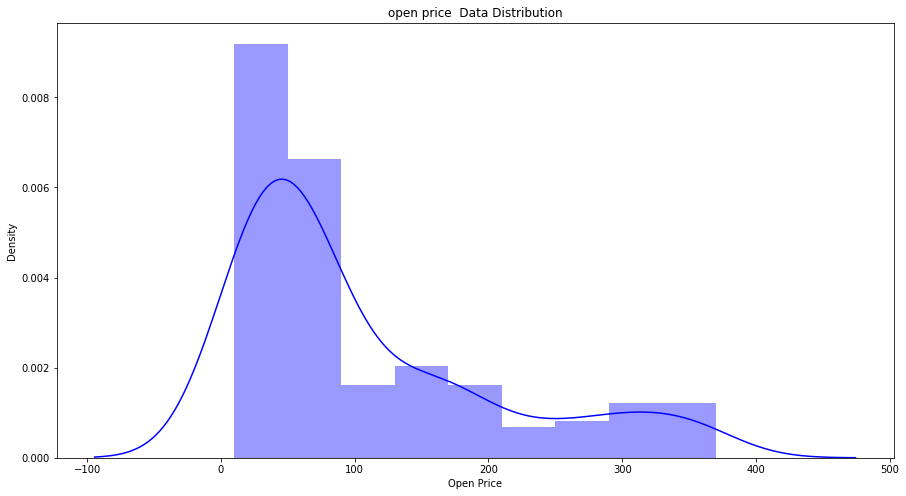

In [ ]:
# distribution of data
plt.figure(figsize=(15,8))
sns.distplot(df['Open'],color="b")
plt.title('open price  Data Distribution')
plt.xlabel('Open Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


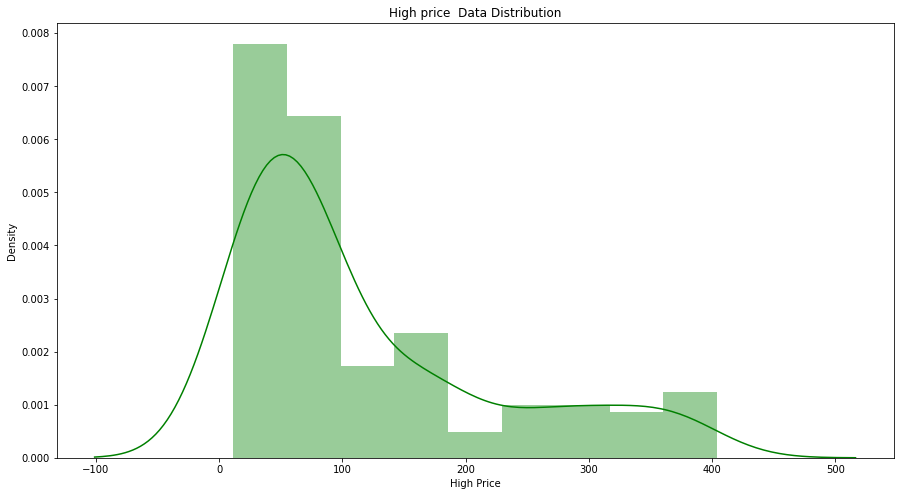

In [ ]:
# distribution of data
plt.figure(figsize=(15,8))
sns.distplot(df['High'],color="g")
plt.title('High price  Data Distribution')
plt.xlabel('High Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


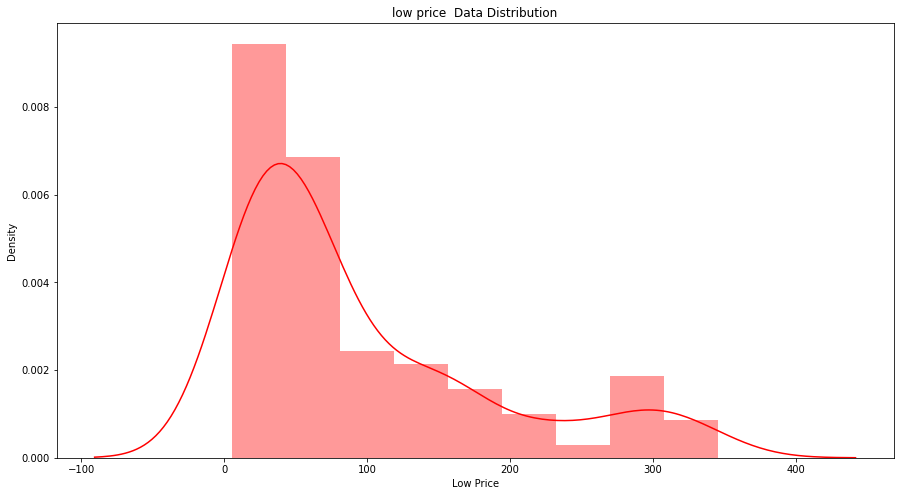

In [ ]:
# distribution of data
plt.figure(figsize=(15,8))
sns.distplot(df['Low'],color="r")
plt.title('low price  Data Distribution')
plt.xlabel('Low Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


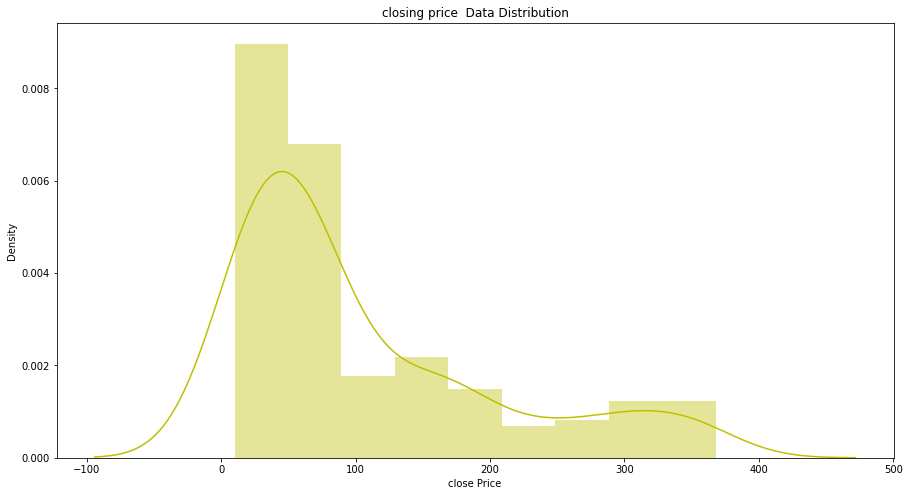

In [ ]:
# distribution of data
plt.figure(figsize=(15,8))
sns.distplot(df['Close'],color="y")
plt.title('closing price  Data Distribution')
plt.xlabel('close Price')
plt.show()

**Histogram plot of all feaures are rightly skewed.**

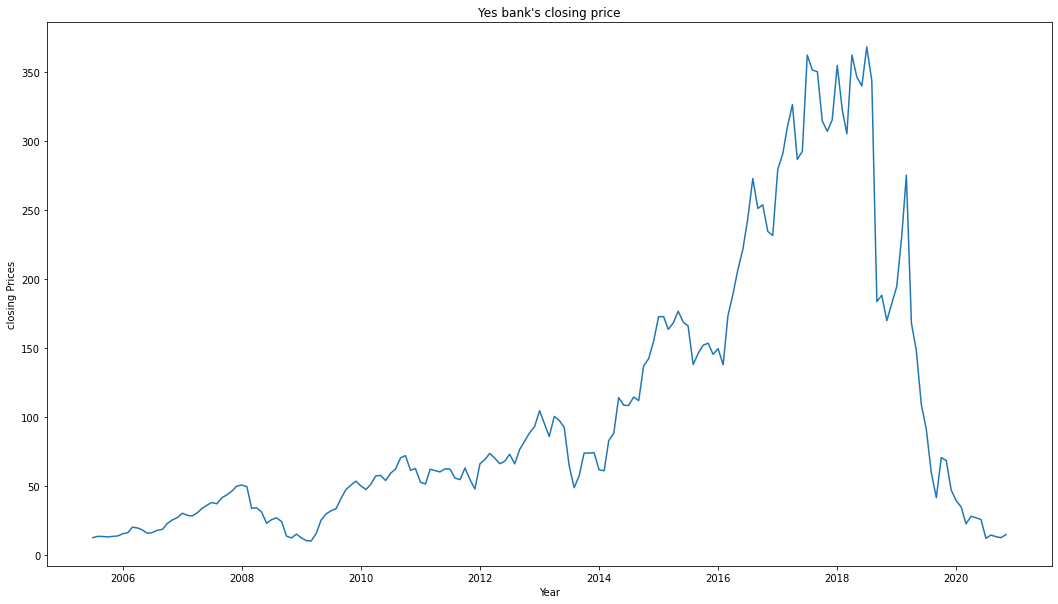

In [ ]:
# Visualizing closing preice vs year
plt.figure(figsize=(18,10))
plt.xlabel('Year')
plt.ylabel('closing Prices')
plt.plot(df['Close'])
plt.title("Yes bank's closing price")
plt.show()

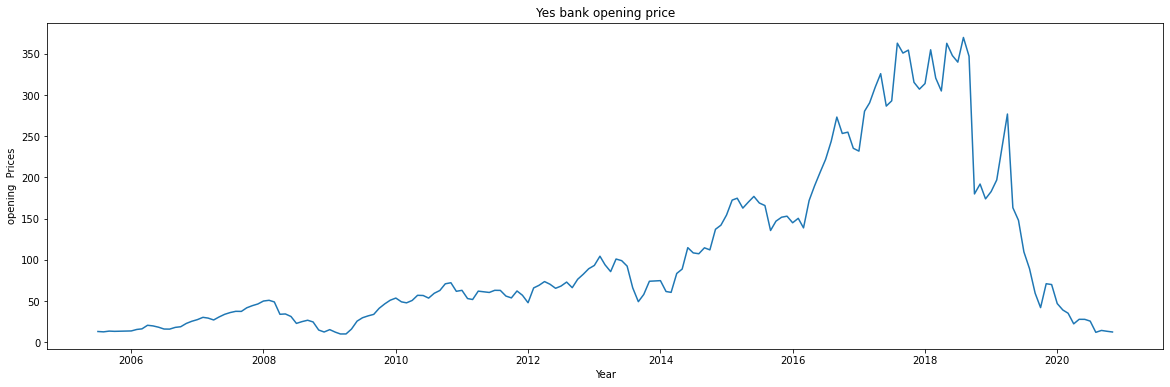

In [ ]:
# visualizing opening price vs year
plt.figure(figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('opening  Prices')
plt.plot(df['Open'])
plt.title('Yes bank opening price')
plt.show()

The sudden crash we see  in the graph after 2018  is  might be due to the spread of Fraud case news among Stock Holder's which creates bearishness in the stock prices.

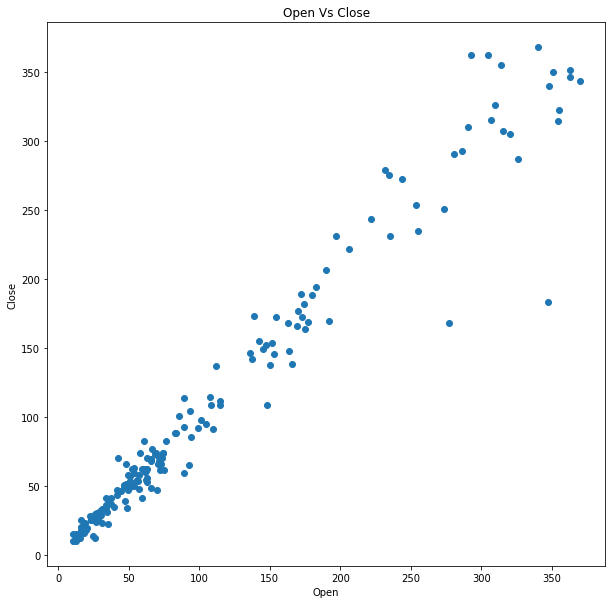

In [ ]:
# open vs close
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('Open Vs Close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()


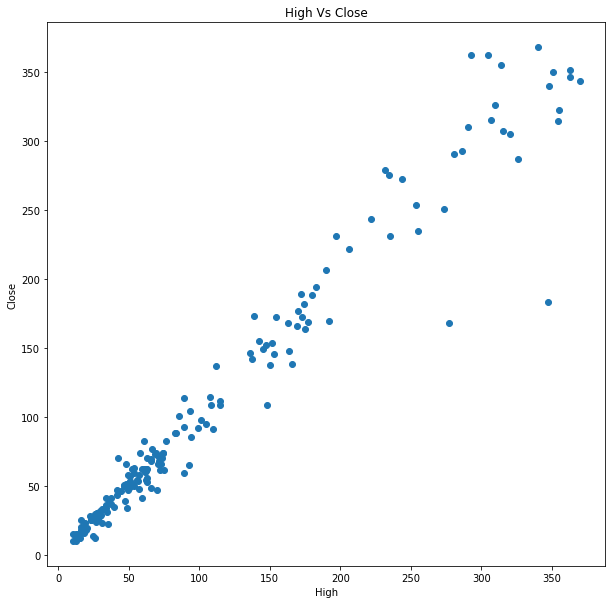

In [ ]:
# high vs close
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('High Vs Close')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

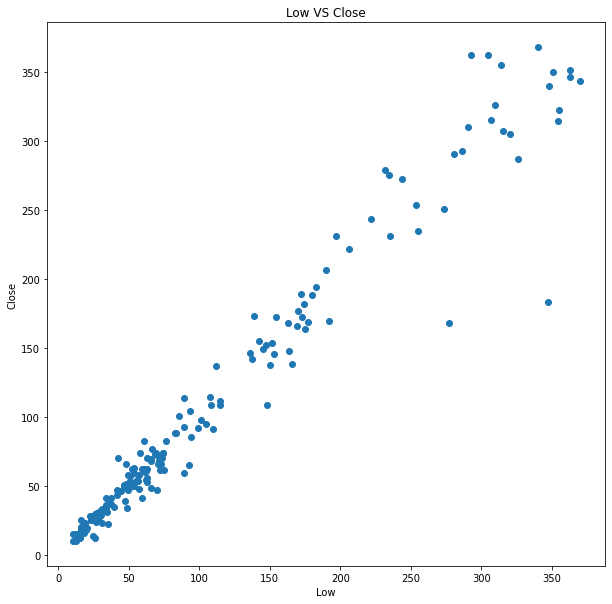

In [ ]:
# low vs close
plt.figure(figsize=(10,10))
plt.scatter(df['Open'],df['Close'])
plt.title('Low VS Close')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

 

*  In the Dataset(df) Close Column is  dependent Variable and Open, High, Low column's are  independent variables. 
*  We  can clearly see that dependent and independent features are linearly related with each other.



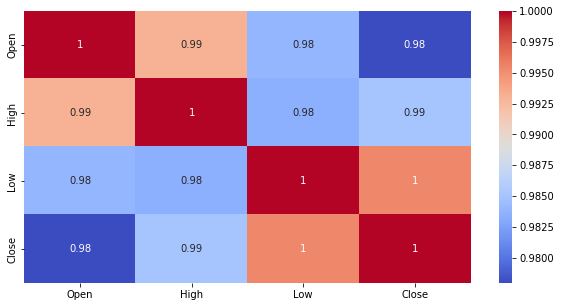

In [ ]:
#finding correlation

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

* The  Heatmap is showing high correlation between the features.
* To handle multi-collinearity we will use regularization technique(like L1 and L2)



**DATA MODELLING**

In [ ]:
# assigning independent and depenent varialble
indep_var=df[['High','Low','Open']].values
dep_var=df["Close"].values

In [ ]:
indep_var

array([[ 14.  ,  11.25,  13.  ],
       [ 14.88,  12.55,  12.58],
       [ 14.87,  12.27,  13.48],
       [ 14.47,  12.4 ,  13.2 ],
       [ 13.88,  12.88,  13.35],
       [ 14.44,  13.  ,  13.49],
       [ 17.16,  13.58,  13.68],
       [ 16.97,  15.4 ,  15.5 ],
       [ 20.95,  16.02,  16.2 ],
       [ 20.8 ,  18.02,  20.56],
       [ 21.8 ,  15.8 ,  19.8 ],
       [ 18.4 ,  13.4 ,  18.2 ],
       [ 17.2 ,  13.82,  16.  ],
       [ 18.6 ,  15.7 ,  15.9 ],
       [ 18.88,  16.8 ,  18.  ],
       [ 24.2 ,  18.5 ,  18.78],
       [ 28.47,  21.4 ,  22.8 ],
       [ 29.66,  24.4 ,  25.4 ],
       [ 34.16,  27.  ,  27.4 ],
       [ 32.6 ,  26.8 ,  30.2 ],
       [ 31.58,  23.31,  29.3 ],
       [ 31.99,  26.2 ,  27.  ],
       [ 36.14,  29.11,  30.66],
       [ 36.38,  30.4 ,  33.89],
       [ 41.04,  35.02,  35.98],
       [ 39.  ,  30.2 ,  37.5 ],
       [ 41.75,  35.3 ,  37.4 ],
       [ 47.3 ,  33.6 ,  41.8 ],
       [ 50.98,  40.02,  44.4 ],
       [ 54.  ,  45.  ,  46.4 ],
       [ 5

In [ ]:
dep_var

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [ ]:
#Train Test Split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=42)

In [ ]:
x_train

array([[ 68.36,  55.44,  61.8 ],
       [ 57.69,  46.71,  53.  ],
       [ 53.97,  44.4 ,  50.88],
       [ 17.2 ,  13.82,  16.  ],
       [ 16.56,  11.13,  12.4 ],
       [262.72, 219.1 , 255.  ],
       [107.  ,  93.2 ,  93.2 ],
       [375.75, 299.  , 354.6 ],
       [ 83.36,  60.34,  60.52],
       [118.69, 103.31, 107.4 ],
       [ 29.8 ,  21.7 ,  26.68],
       [175.58, 156.45, 169.  ],
       [100.4 ,  57.71,  92.4 ],
       [ 63.7 ,  52.04,  62.2 ],
       [268.45, 168.6 , 180.  ],
       [ 14.87,  12.27,  13.48],
       [275.  , 240.68, 244.  ],
       [ 28.84,  14.76,  15.94],
       [ 70.5 ,  40.7 ,  70.  ],
       [350.1 , 327.35, 348.  ],
       [ 74.78,  65.27,  73.  ],
       [366.  , 307.35, 314.  ],
       [ 41.75,  35.3 ,  37.4 ],
       [350.  , 166.15, 347.2 ],
       [ 30.45,  20.3 ,  22.3 ],
       [173.88, 156.1 , 172.5 ],
       [ 66.5 ,  46.11,  47.92],
       [ 30.5 ,  20.4 ,  22.85],
       [175.12, 138.35, 138.8 ],
       [ 36.14,  29.11,  30.66],
       [11

In [ ]:
#Checking shape
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [ ]:
# mean of x_train
x_train.mean(axis=0)

array([117.40324324,  96.63540541, 107.09675676])

In [ ]:
# mean of x_test
x_test.mean(axis=0)

array([110.90864865,  88.19756757,  99.32      ])

In [ ]:
# standard deviation of x_train
x_train.std(axis=0)

array([106.86800299,  91.18688597,  99.27364008])

In [ ]:
# standard deviation of x_train
x_test.std(axis=0)

array([102.52633397,  89.79346877,  95.66853785])

In [ ]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [ ]:
# mean of x_train
x_test_norm.mean(axis=0)

array([-1.32026522e-16,  8.70174803e-17,  7.50150692e-17])

In [ ]:
# mean of x_train
x_train_norm.mean(axis=0)

array([1.84537070e-16, 6.10997739e-16, 1.12522604e-16])

In [ ]:
# standard deviation of x_train
x_train_norm.std(axis=0)

array([1., 1., 1.])

In [ ]:
# standard deviation of x_test
x_test_norm.std(axis=0)

array([1., 1., 1.])

now our data  is normalized mean is close to 0 and standard deviation is 1.

<!-- **Linear Regression** -->

##**Linear Regression**

In [ ]:
# implementing Linear_regression model
regres = LinearRegression().fit(x_train_norm, y_train)

In [ ]:
# coefficient
regres.coef_

array([ 57.37023306,  91.49908703, -50.15576763])

In [ ]:
# intercept
regres.intercept_

106.93182432432427

In [ ]:
# predicted value
y_pred = regres.predict(x_test_norm)
y_pred

array([ 36.78644223,  21.01808124, 387.6879811 , 136.68055696,
       327.82972698,  29.61555   ,  46.85505809,  68.13904835,
       175.87611058,  71.09757582,  54.45192635, 207.18359402,
        74.40902715,  43.58212283,  21.73154362,  32.85243174,
        52.25529404,  31.77965714,  69.62763902,  59.33790608,
       190.26639663, 162.67633251, 389.56732303,  42.76419076,
        26.29071504, 143.78061212,  67.12097163,  39.33110888,
        58.19887935, 155.85866627,  64.13637429,  55.63295239,
       176.5776747 , 273.24777984,  59.93306232,  58.813748  ,
        43.48343886])

In [ ]:
# model accuray
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :",mean_absolute_error(y_test, y_pred))
print("R2 :",r2_score(y_test, y_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 172.0169027354591
RMSE : 13.115521443520997
MAE : 10.664853845189194
R2 : 0.9809691253775973
Adjusted R2: 0.9792390458664698


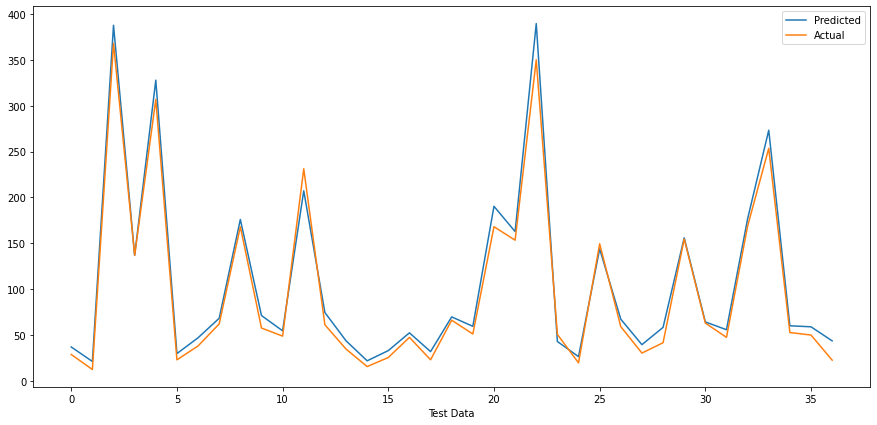

In [ ]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()



1. Linear regression is giving about 99% correct prediction.
2. It's r2 score is 0.98 which is very good.




##**LASSO REGRESSION**

In [ ]:
# implementing lasso_regression model
lasso  = Lasso(alpha=0.0001 , max_iter= 2000)
lasso.fit(x_train_norm, y_train)

Lasso(alpha=0.0001, max_iter=2000)

In [ ]:
# predictions
lasso_pred=lasso.predict(x_test_norm)
lasso_pred

array([ 36.78694459,  21.01834606, 387.68640592, 136.67957734,
       327.83138779,  29.61574696,  46.85544486,  68.13875853,
       175.87704181,  71.0954748 ,  54.45212293, 207.18105623,
        74.40954337,  43.58271881,  21.7314491 ,  32.85260265,
        52.25498959,  31.78011342,  69.62847327,  59.3385145 ,
       190.26468742, 162.67755108, 389.56807336,  42.76395585,
        26.29136798, 143.78148138,  67.1213225 ,  39.3312557 ,
        58.19803332, 155.85909355,  64.13616582,  55.63360457,
       176.57914747, 273.2494698 ,  59.93370405,  58.81396992,
        43.47790369])

In [ ]:
# model accuray
print("MSE :",mean_squared_error(y_test, lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, lasso_pred)))
print("MAE :",mean_absolute_error(y_test, lasso_pred))
print("R2 :",r2_score(y_test, lasso_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (lasso_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 172.01763221750002
RMSE : 13.115549253367165
MAE : 10.665009686010295
R2 : 0.9809690446722652
Adjusted R2: 0.9792389578242893


In [ ]:
# Let's check through cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train_norm, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+03, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 1.156e+02

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best alpha value is
lasso_regressor.best_params_


{'alpha': 0.001}

In [ ]:
#Best score
lasso_regressor.best_score_

-47.88725192965197

In [ ]:
# predictions
y_pred_lasso = lasso_regressor.predict(x_test_norm)
y_pred_lasso

array([ 36.79002588,  21.01983654, 387.67727947, 136.67346322,
       327.84276909,  29.61687095,  46.8578448 ,  68.1368715 ,
       175.88331836,  71.08188593,  54.45307082, 207.16484025,
        74.41286793,  43.58640295,  21.73066896,  32.85355718,
        52.25291362,  31.78281999,  69.63371436,  59.34239204,
       190.25279784, 162.68563992, 389.57396528,  42.76211693,
        26.29539295, 143.78712688,  67.12356706,  39.33208928,
        58.19232363, 155.86205415,  64.13473505,  55.63770602,
       176.58880283, 273.26098543,  59.93764666,  58.81534423,
        43.44179205])

In [ ]:
# model accuray
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 172.02460663924845
RMSE : 13.115815134380648
MAE : 10.666010957761793
R2 : 0.9809682730658489
Adjusted R2: 0.9792381160718352


The value of R square score is 98% which shows our model is good  for prediction.

# **Visualizing  actual values and predicted values**

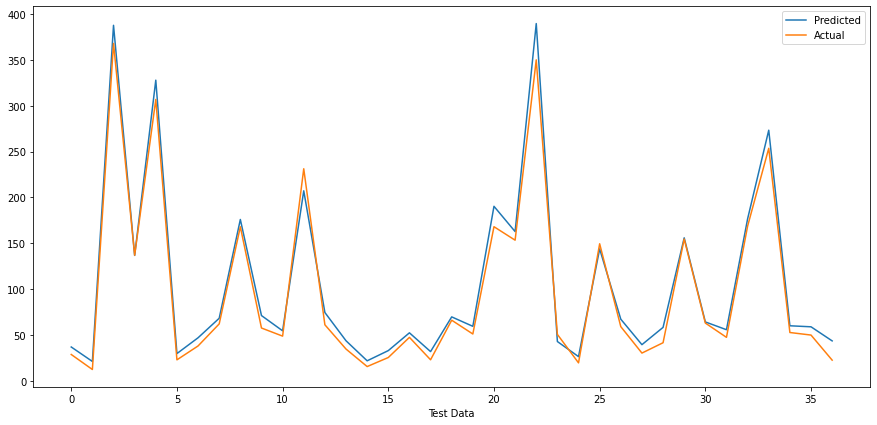

In [ ]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

##**Ridge regression**

In [ ]:
# implementing ridge_regression model
ridge  = Ridge(alpha=0.01)
ridge.fit(x_train_norm,y_train)

Ridge(alpha=0.01)

In [ ]:
# predictions
ridge_pred=ridge.predict(x_test_norm)
ridge_pred

array([ 36.79685714,  21.02522688, 387.54183299, 136.60725443,
       327.86222668,  29.60554568,  46.84993033,  68.10325997,
       175.88253232,  71.0051182 ,  54.51406788, 207.12591806,
        74.40328266,  43.601576  ,  21.71212372,  32.84451369,
        52.2349556 ,  31.80789199,  69.67023401,  59.33611961,
       190.53250008, 162.69500762, 389.50035026,  42.80272259,
        26.30653953, 143.8292642 ,  67.10759733,  39.31706364,
        58.20627231, 155.850935  ,  64.12100641,  55.64744263,
       176.63855229, 273.25428252,  59.97819249,  58.80081752,
        43.35848572])

In [ ]:
# model accuracy
print("MSE :",mean_squared_error(y_test, ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, ridge_pred)))
print("MAE :",mean_absolute_error(y_test, ridge_pred))
print("R2 :",r2_score(y_test, ridge_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (ridge_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 171.99540764541263
RMSE : 13.114701965558067
MAE : 10.667221119712503
R2 : 0.9809715034599669
Adjusted R2: 0.9792416401381456


In [ ]:
# cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train_norm,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
# best parameter
ridge_regressor.best_params_

{'alpha': 0.01}

In [ ]:
# best score
ridge_regressor.best_score_

-48.45396150468405

In [ ]:
#Prediction
y_pred_ridge = ridge_regressor.predict(x_test_norm)
y_pred_ridge

array([ 36.79685714,  21.02522688, 387.54183299, 136.60725443,
       327.86222668,  29.60554568,  46.84993033,  68.10325997,
       175.88253232,  71.0051182 ,  54.51406788, 207.12591806,
        74.40328266,  43.601576  ,  21.71212372,  32.84451369,
        52.2349556 ,  31.80789199,  69.67023401,  59.33611961,
       190.53250008, 162.69500762, 389.50035026,  42.80272259,
        26.30653953, 143.8292642 ,  67.10759733,  39.31706364,
        58.20627231, 155.850935  ,  64.12100641,  55.64744263,
       176.63855229, 273.25428252,  59.97819249,  58.80081752,
        43.35848572])

In [ ]:
# model accuracy
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 171.99540764541263
RMSE : 13.114701965558067
MAE : 10.667221119712503
R2 : 0.9809715034599669
Adjusted R2: 0.9792416401381456


The value of R square score is 98% which shows our model is good for prediction.

# **Visualizing  actual values and predicted values**

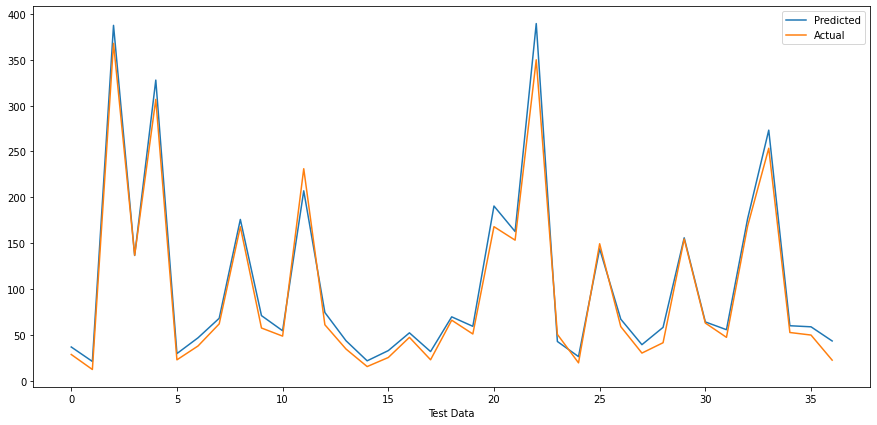

In [ ]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

##**ELASTICNET REGRESSION**

In [ ]:
# implementing Elasticnet_regression model
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
elasticnet.fit(x_train_norm,y_train)

ElasticNet(alpha=0.001)

In [ ]:
# prediction
easticnet_pred=elasticnet.predict(x_test_norm)
easticnet_pred

array([ 36.85869237,  21.06795838, 386.65399897, 136.16268301,
       328.05471858,  29.54366547,  46.81715808,  67.88552259,
       175.91832257,  70.44760494,  54.89330898, 206.78265709,
        74.36625164,  43.71832518,  21.59375703,  32.7954855 ,
        52.11174343,  31.97885732,  69.92758958,  59.32295129,
       192.16587675, 162.80465671, 389.08799272,  43.03920974,
        26.40089494, 144.12350515,  67.02453042,  39.23065916,
        58.25462866, 155.80206414,  64.02782671,  55.73363479,
       177.00529594, 273.28772548,  60.25176626,  58.72094509,
        42.61503534])

In [ ]:
# model accuracy
print("MSE :",mean_squared_error(y_test, easticnet_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, easticnet_pred)))
print("MAE :",mean_absolute_error(y_test, easticnet_pred))
print("R2 :",r2_score(y_test, easticnet_pred))
print("Adjusted R2:",1-(1-r2_score((y_test), (easticnet_pred)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 172.03726716863588
RMSE : 13.116297769135766
MAE : 10.681118649055106
R2 : 0.9809668723840346
Adjusted R2: 0.9792365880553104


In [ ]:
# cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train_norm, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+03, tolerance: 1.080e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 1.156e+02

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
# best prameter
elastic_regressor.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.4}

In [ ]:
# best score
elastic_regressor.best_score_

-47.97491622238411

In [ ]:
#Prediction
y_pred_elastic = elastic_regressor.predict(x_test_norm)

In [ ]:
# model accuracy
print("MSE :",mean_squared_error(y_test, y_pred_elastic))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print("MAE :",mean_absolute_error(y_test, y_pred_elastic))
print("R2 :",r2_score(y_test, y_pred_elastic))
print("Adjusted R2:",1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test_norm.shape[0]-1)/(x_test_norm.shape[0]-x_test_norm.shape[1]-1)))

MSE : 172.01690252519595
RMSE : 13.115521435505183
MAE : 10.66485384591219
R2 : 0.9809691254008595
Adjusted R2: 0.9792390458918466


The value of R saquare score is 98% which shows our model is good for prediction.

# **Visualizing  actual values and predicted values**

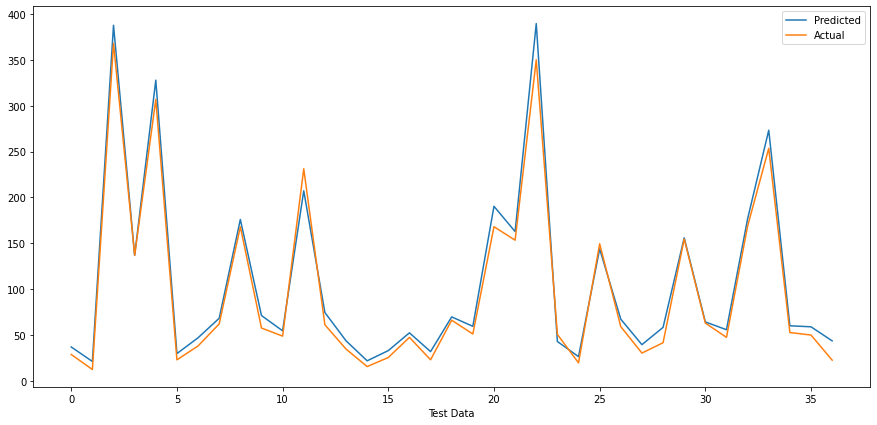

In [ ]:
# visualizing actual vs predicted
plt.figure(figsize=(15,7))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.show()

##**CONCLUSION**


*   This project is about the  of Yes bank's stock price prediction.



*   This dataset has 185 rows and 5 columns.


*   Histogram plot of all feaures are rightly skewed.

*   The sudden crash we see  in the graph after 2018  is  might be due to the spread of Fraud case news among Stock Holder's which creates bearishness in the stock prices.




*   In the Dataset Close Column is dependent Variable and Open, High, Low column's are independent features.



*   Dependent and Independent features are linearly related with each other.

*   The Heatmap is showing high correlation between the features.
*   Then We implemented Linear regression ,Lasso regression,Ridge regression and Elasticnet regression and the accuracy score that we got is almost 98%,which shows that we achieve the almost best fit model for our dataset.











